<a href="https://colab.research.google.com/github/CristobalSVM/Aprendizaje-Automatico/blob/main/Tarea_6_AS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea (10 puntos)

###Investigar sobre algoritmos supervisados que puedan aplicarse a tu problema. Da un panorama sobre el modelo matemático que emplean y explica por qué conviene utilizarlo

Algortimo XGBoost

XGBoost es un método de aprendizaje automático supervisado para clasificación y regresión, es la abreviatura de las palabras inglesas "extreme gradient boosting" (refuerzo de gradientes extremo). Este método se basa en árboles de decisión y supone una mejora sobre otros métodos, Random Forest, Boostin, entre otros. Funciona bien con datasets grandes y complejos al utilizar varios métodos de optimización.  
\
El algoritmo funciona de la siguiente manera:  
\
a) Se obtiene un árbol inicial F0 para predecir la variable objetivo “y”, el resultado se asocia con un residual ( y – $F_{0}$ ).  
 \
b) Se obtiene un nuevo árbol $h_1$ que ajusta al error del paso previo.  
\
c) Los resultados de $F_{0}$ y $h_1$ se combinan para obtener el árbol F1, donde el error cuadrático medio de F1 será menor que el de F0:  
\
$$F_1 (x) < - F_0(x) + h_1(x)$$  \\

d) Este proceso se sigue iterativamente hasta que el error es minimizado lo más posible de la siguiente forma:  
\
$$Fm (x) < - F_{m-1}(x) + h_m(x)$$  

\
Como menciona Zuñiga (2020)Conviene utilizarlo porque puede manejar grandes bases de datos con múltiples variables, valores perdidos, sus resultados son muy precisos y es muy bueno en velocidad de ejecución y también trabaja con valores númericos y Las ventajas de este algoritmo hace que se aplique en campos como: identificación de huellas digitales, seguridad vial y análisis de mercados financieros, entre otros.

##Investigar sobre métricas para analizar los errores de tus datos y discutirla (generalmente se usan MAE, MAPE, RMSE, MSE...)
\
###**Error absoluto medio (MAE por sus siglas en inglés)**

En MAE, el error se calcula como un promedio de diferencias absolutas entre los valores objetivo y las predicciones. El MAE es una puntuación lineal, lo que significa que todas las diferencias individuales se ponderan por igual en el promedio. Por ejemplo, la diferencia entre 10 y 0 será el doble de la diferencia entre 5 y 0. Sin embargo, lo mismo no es cierto para RMSE. Matemáticamente, se calcula utilizando esta fórmula:

$$MAE = \frac{1}{N}\Sigma_{i=1}^n |y_i - \hat{y}|$$

Lo importante de esta métrica es que penaliza errores enormes que no tan mal como lo hace MSE. Por lo tanto, no es tan sensible a los valores atípicos como el error cuadrático medio.  
\
El MAE se usa ampliamente en finanzas, donde el error de 10 suele ser exactamente dos veces peor que el error de 5. Por otro lado, la métrica de MSE piensa que el error de 10 es cuatro veces peor que el error de 5. MAE es más fácil de justificar que RMSE.  

\
###**Error porcentual absoluto medio (MAPE por sus siglas en inglés)**  
La preferencia de error relativo también se puede expresar con el Error porcentual absoluto medio, MAPE. Para cada objeto, el error absoluto se divide por el valor objetivo, dando un error relativo. MAPE también puede ser pensado como versiones ponderadas de MAE.  

$$MAPE = \frac{100\%}{N}\Sigma_{i=1}^n |\frac{y_i - \hat{y}}{y_i}|$$  

Para MAPE, el peso de su muestra es inversamente proporcional a su objetivo. El costo que pagamos por un error absoluto fijo depende del valor objetivo. Y a medida que aumenta el objetivo, pagamos menos.  
\
Dado que MAPE se considera como la versión ponderada de MAE, las predicciones constantes óptimas para MAPE resultan ser la mediana ponderada de los valores objetivo.   

\
###**Error cuadrático medio (MSE por sus siglas en inglés)**  

Es quizás la métrica más simple y común para la evaluación de regresión, pero también es probablemente la menos útil. Se define por la ecuación siguiente:  

$$MSE = \frac{1}{N}\Sigma_{i=1}^n (y_i - \hat{y})^2$$  

\
donde yᵢ es el resultado real esperado y ŷᵢ es la predicción del modelo.  

MSE básicamente mide el error cuadrado promedio de nuestras predicciones. Para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores.  

Cuanto mayor sea este valor, peor es el modelo. Nunca es negativo, ya que estamos cuadrando los errores de predicción individuales antes de sumarlos, pero sería cero para un modelo perfecto.  

\
###**Error cuadrático medio (RMSE por sus siglas en inglés)**
RMSE es solo la raíz cuadrada de MSE. La raíz cuadrada se introduce para hacer que la escala de los errores sea igual a la escala de los objetivos.  

$$RMSE = \sqrt{\frac{1}{N}\Sigma_{i=1}^n (y_i - \hat{y})^2}$$  





##Aplicar al menos un algoritmo supervisado a tus datos para predecir alguna variable (puede ser interpolación o extrapolación)


In [1]:
#REGRESIÓN LINEAL

#Importar librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#Acceso a google drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

#Carga de base
bd_BR = "/content/drive/MyDrive/Tarea 2 BD_BR.xlsx"
df = pd.read_excel(bd_BR)
df


Mounted at /content/drive


,id,fecha,activo,vista,plazo,prestamos interbancarios,sucursales,cajeros,tarjetas
0,1,201612,9.748517e+10,2.922565e+10,35428115940,6.761324e+09,147,274,75627
1,2,201701,9.912669e+10,2.913157e+10,36612242954,6.610840e+09,149,283,76116
2,3,201702,9.860860e+10,2.834034e+10,37709507528,6.352306e+09,149,282,77057
3,4,201703,9.858651e+10,2.855841e+10,38137700755,6.238445e+09,149,284,78379
4,5,201704,9.731282e+10,2.946925e+10,38679704639,6.377189e+09,149,283,79406
...,...,...,...,...,...,...,...,...,...
56,57,202108,1.601921e+11,6.032032e+10,46331947444,4.434798e+09,169,351,205704
57,58,202109,1.600526e+11,6.118401e+10,45412168111,4.333770e+09,170,364,212165
58,59,202110,1.616247e+11,6.153808e+10,44615468429,4.450421e+09,157,349,219334
59,60,202111,1.643413e+11,6.303590e+10,44254716609,4.662185e+09,158,360,227138


In [2]:
### PROCESAMIENTO DE LOS DATOS ###
#Eliminamos las columnas de id y fecha 
df = df.drop(['id', 'fecha'], axis = 1)

scaler = MinMaxScaler()
# https://stackoverflow.com/a/43383700
scaled = scaler.fit_transform(df)
# https://datatofish.com/numpy-array-to-pandas-dataframe/
df_scaled = pd.DataFrame(scaled, columns = df.columns)
df_scaled

,activo,vista,plazo,prestamos interbancarios,sucursales,cajeros,tarjetas
0,0.002571,0.025517,0.000000,0.609207,0.000000,0.028037,0.000000
1,0.027061,0.022805,0.047071,0.571442,0.076923,0.112150,0.003169
2,0.019332,0.000000,0.090690,0.506562,0.076923,0.102804,0.009267
3,0.019002,0.006285,0.107712,0.477988,0.076923,0.121495,0.017833
4,0.000000,0.032538,0.129257,0.512806,0.076923,0.112150,0.024488
...,...,...,...,...,...,...,...
56,0.938097,0.921731,0.433450,0.025353,0.846154,0.747664,0.842910
57,0.936017,0.946624,0.396887,0.000000,0.884615,0.869159,0.884778
58,0.959471,0.956830,0.365216,0.029274,0.384615,0.728972,0.931233
59,1.000000,1.000000,0.350876,0.082417,0.423077,0.831776,0.981804


In [21]:
df_train = df.sample(frac = 0.7)
x_train = df_train[['vista', 'plazo', 'prestamos interbancarios', 'sucursales', 'cajeros','tarjetas']]
y_train = df_train[['activo']]

In [22]:
df_test = df.drop(df_train.index)

x_test = df_test[['vista', 'plazo', 'prestamos interbancarios', 'sucursales', 'cajeros','tarjetas']]
y_test = df_test[['activo']]

In [27]:
# Paquete del modelo
from sklearn import linear_model

# Creación del objeto del modelo
model = linear_model.LinearRegression()

# Entrenamiento y ajuste del modelo
model.fit(x_train, y_train)

# Los atributos intercept y coef devuelven los valores de b; lo que devuelve la ecuación del modelo para explicar Y
print(f'y = {round(model.intercept_[0], 4)}', end = ' ')
for i in range(len(model.coef_[0])):
    print(f'+ X_{i} ({round(model.coef_[0][i], 4)})', end = ' ')

y = -23320316677.5509 + X_0 (1.13) + X_1 (0.9383) + X_2 (-0.0891) + X_3 (33223343.7874) + X_4 (155170021.0176) + X_5 (50404.4634) 

In [28]:
# Se predice a partir de los valores de prueba
y_pred = model.predict(x_test)
y_pred

array([[9.35551969e+10],
       [9.61117114e+10],
       [1.02921587e+11],
       [1.11183695e+11],
       [1.17238680e+11],
       [1.23529033e+11],
       [1.28407157e+11],
       [1.33801075e+11],
       [1.39765298e+11],
       [1.43070617e+11],
       [1.37052712e+11],
       [1.39524855e+11],
       [1.42010108e+11],
       [1.46017357e+11],
       [1.49552747e+11],
       [1.56597173e+11],
       [1.55607637e+11],
       [1.58106753e+11]])

In [29]:
from sklearn.metrics import mean_absolute_percentage_error as mape

# Se usa una métrica de error adecuada (MAPE calcula el porcentaje del error cuadrado medio)
mape(y_pred, y_test)

0.016915890141648064

In [30]:
# Se reintegra en el conjunto de datos
#df_na.value = y_pred_na
df_inter = df_scaled.copy()
df_inter

,activo,vista,plazo,prestamos interbancarios,sucursales,cajeros,tarjetas
0,0.002571,0.025517,0.000000,0.609207,0.000000,0.028037,0.000000
1,0.027061,0.022805,0.047071,0.571442,0.076923,0.112150,0.003169
2,0.019332,0.000000,0.090690,0.506562,0.076923,0.102804,0.009267
3,0.019002,0.006285,0.107712,0.477988,0.076923,0.121495,0.017833
4,0.000000,0.032538,0.129257,0.512806,0.076923,0.112150,0.024488
...,...,...,...,...,...,...,...
56,0.938097,0.921731,0.433450,0.025353,0.846154,0.747664,0.842910
57,0.936017,0.946624,0.396887,0.000000,0.884615,0.869159,0.884778
58,0.959471,0.956830,0.365216,0.029274,0.384615,0.728972,0.931233
59,1.000000,1.000000,0.350876,0.082417,0.423077,0.831776,0.981804


In [31]:
# Se desescala el conjunto de datos, previamente escalado
descaled = scaler.inverse_transform(df_scaled)
df_descaled = pd.DataFrame(descaled, columns = df_scaled.columns, index = df_scaled.index)
df_descaled

,activo,vista,plazo,prestamos interbancarios,sucursales,cajeros,tarjetas
0,9.748517e+10,2.922565e+10,3.542812e+10,6.761324e+09,147.0,274.0,75627.0
1,9.912669e+10,2.913157e+10,3.661224e+10,6.610840e+09,149.0,283.0,76116.0
2,9.860860e+10,2.834034e+10,3.770951e+10,6.352306e+09,149.0,282.0,77057.0
3,9.858651e+10,2.855841e+10,3.813770e+10,6.238445e+09,149.0,284.0,78379.0
4,9.731282e+10,2.946925e+10,3.867970e+10,6.377189e+09,149.0,283.0,79406.0
...,...,...,...,...,...,...,...
56,1.601921e+11,6.032032e+10,4.633195e+10,4.434798e+09,169.0,351.0,205704.0
57,1.600526e+11,6.118401e+10,4.541217e+10,4.333770e+09,170.0,364.0,212165.0
58,1.616247e+11,6.153808e+10,4.461547e+10,4.450421e+09,157.0,349.0,219334.0
59,1.643413e+11,6.303590e+10,4.425472e+10,4.662185e+09,158.0,360.0,227138.0


In [32]:
df_final = df_descaled
df_final

,activo,vista,plazo,prestamos interbancarios,sucursales,cajeros,tarjetas
0,9.748517e+10,2.922565e+10,3.542812e+10,6.761324e+09,147.0,274.0,75627.0
1,9.912669e+10,2.913157e+10,3.661224e+10,6.610840e+09,149.0,283.0,76116.0
2,9.860860e+10,2.834034e+10,3.770951e+10,6.352306e+09,149.0,282.0,77057.0
3,9.858651e+10,2.855841e+10,3.813770e+10,6.238445e+09,149.0,284.0,78379.0
4,9.731282e+10,2.946925e+10,3.867970e+10,6.377189e+09,149.0,283.0,79406.0
...,...,...,...,...,...,...,...
56,1.601921e+11,6.032032e+10,4.633195e+10,4.434798e+09,169.0,351.0,205704.0
57,1.600526e+11,6.118401e+10,4.541217e+10,4.333770e+09,170.0,364.0,212165.0
58,1.616247e+11,6.153808e+10,4.461547e+10,4.450421e+09,157.0,349.0,219334.0
59,1.643413e+11,6.303590e+10,4.425472e+10,4.662185e+09,158.0,360.0,227138.0


In [33]:
pronostico = []

for num in list(range(61)):
	pronostico.append(-23320316677.5509 + df_final['vista'][num]*(1.13) + df_final['plazo'][num]*(0.9383) + df_final['prestamos interbancarios'][num]*(-0.0891) + df_final['sucursales'][num]*(33223343.7874) + df_final['cajeros'][num]*(155170021.0176) + df_final['tarjetas'][num]*(50404.4634))


In [34]:
df_final['original'] = np.nan
df_final.loc[df.index, 'original'] = df_final.loc[df.index, 'activo']
df_final.loc[:,'ypred'] = pronostico

In [36]:
df_final

,activo,vista,plazo,prestamos interbancarios,sucursales,cajeros,tarjetas,original,ypred
0,9.748517e+10,2.922565e+10,3.542812e+10,6.761324e+09,147.0,274.0,75627.0,9.748517e+10,9.355679e+10
1,9.912669e+10,2.913157e+10,3.661224e+10,6.610840e+09,149.0,283.0,76116.0,9.912669e+10,9.606258e+10
2,9.860860e+10,2.834034e+10,3.770951e+10,6.352306e+09,149.0,282.0,77057.0,9.860860e+10,9.611335e+10
3,9.858651e+10,2.855841e+10,3.813770e+10,6.238445e+09,149.0,284.0,78379.0,9.858651e+10,9.714867e+10
4,9.731282e+10,2.946925e+10,3.867970e+10,6.377189e+09,149.0,283.0,79406.0,9.731282e+10,9.857070e+10
...,...,...,...,...,...,...,...,...,...
56,1.601921e+11,6.032032e+10,4.633195e+10,4.434798e+09,169.0,351.0,205704.0,1.601921e+11,1.583676e+11
57,1.600526e+11,6.118401e+10,4.541217e+10,4.333770e+09,170.0,364.0,212165.0,1.600526e+11,1.608656e+11
58,1.616247e+11,6.153808e+10,4.461547e+10,4.450421e+09,157.0,349.0,219334.0,1.616247e+11,1.581097e+11
59,1.643413e+11,6.303590e+10,4.425472e+10,4.662185e+09,158.0,360.0,227138.0,1.643413e+11,1.615783e+11


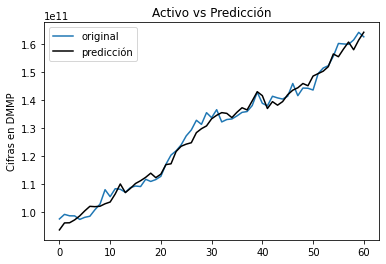

In [56]:
# Se representan los datos interpolados
t = df_final
plt.figure()
plt.plot(t.original, label="original")
plt.plot(t.ypred, label="predicción", c = 'black')
plt.title('Activo vs Predicción')
plt.ylabel('Cifras en DMMP')
plt.legend()
plt.savefig('reg3.pdf')
plt.show()


De acuerdo con el resultado del MAPE = 0.0167, se considera un valor pequeño, por lo tanto, se tiene un buen ajuste del modelo, pero no hay que basarnos solo en esta medición, también hay que complementar con el ajuste del modelo.  
\
La gráfica azul son los valores reales de los datos mientras que la línea negra son los valores predecidos de la variable activo.  
\
Se observa la misma tendencia a la alta y en varios puntos coincide pero por teoría, la línea negra debería ser una línea recta, por lo tanto, y aunque coincida en varios puntos, no es un modelo que ajuste de forma adecuada a los datos.



##Actualiza literatura relacionada, metodología, resultados y discusión en tu artículo


##Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados
